In [1]:
#Text classification : -
#Firstly install all essential libraries.
import pandas as PD
import numpy as NP
import matplotlib.pyplot as MPL
import seaborn as SB
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rites\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rites\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rites\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
 #To load dataset spam.csv

R_NS = PD.read_csv('review.csv',encoding='latin-1')
R_NS

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...,...
994,994,I just got bored watching Jessice Lange take h...,0
995,995,"Unfortunately, any virtue in this film's produ...",0
996,996,"In a word, it is embarrassing.",0
997,997,Exceptionally bad!,0


In [4]:
R_NS.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
R_NS

,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [6]:
R_NS.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
R_NS.dtypes

review       object
sentiment     int64
dtype: object

In [8]:
R_NS.shape

(999, 2)

In [9]:
#How many category in sentiment column
R_NS['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

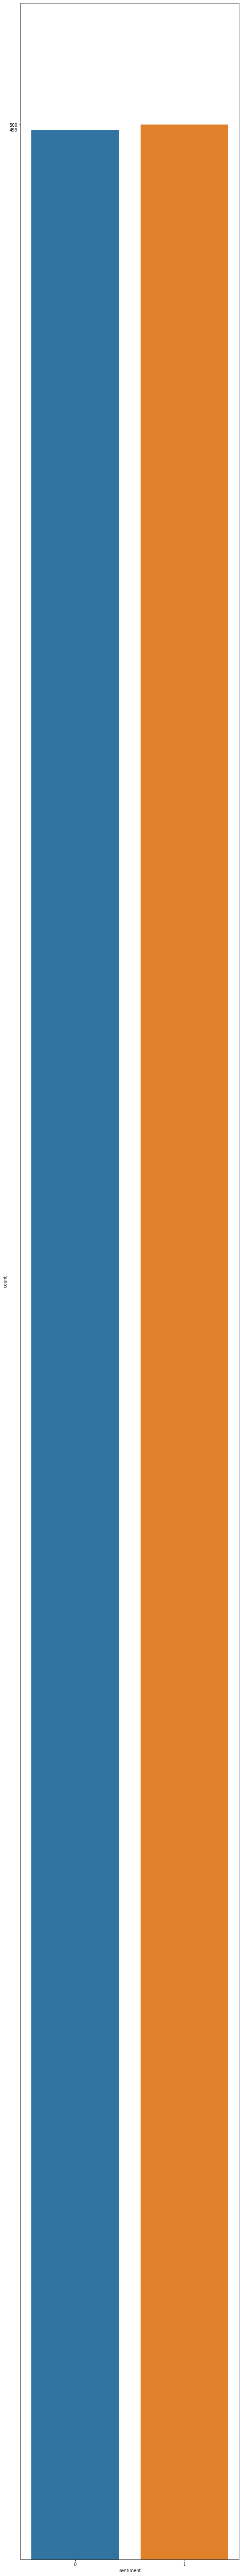

In [10]:
#Visualise from
MPL.figure(figsize=(9,108))
SB.countplot(data=R_NS,x='sentiment')
RF = R_NS['sentiment'].value_counts()
MPL.yticks(RF)
MPL.show()

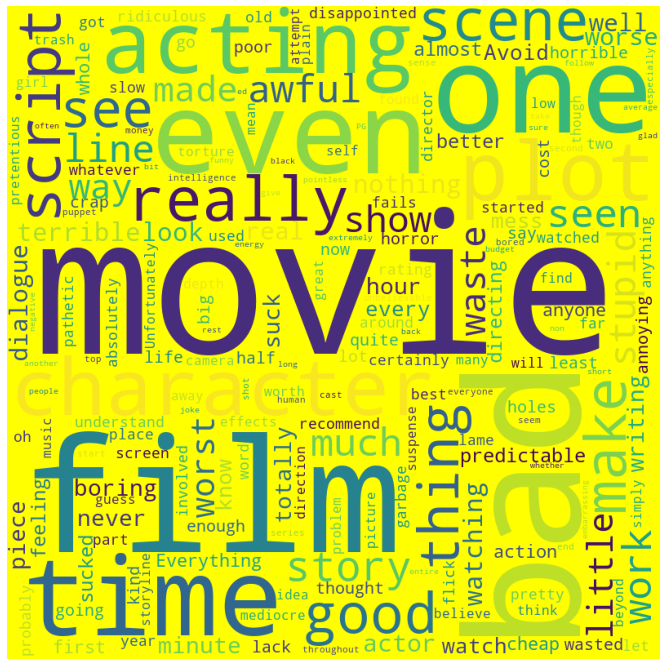

In [11]:
#Create a Wordcloud
#First create object
#Call
from wordcloud import WordCloud,STOPWORDS
#Create an object of WordCloud class
W_C = WordCloud(width=800,height=800,background_color='yellow',stopwords=STOPWORDS,min_font_size=10)
#Generate
#S_NS[S_NS['category']== 'not spam']
W_C.generate(''.join(R_NS[R_NS['sentiment']==0]['review']))
#Generate() inbuilt method of WordCloud class

#Show wordcloud on output screen
import matplotlib.pyplot as MPL
MPL.figure(figsize=(12,12))
#To show image on output screen : imshow() means image show.
MPL.imshow(W_C)
MPL.axis('off')
MPL.show()

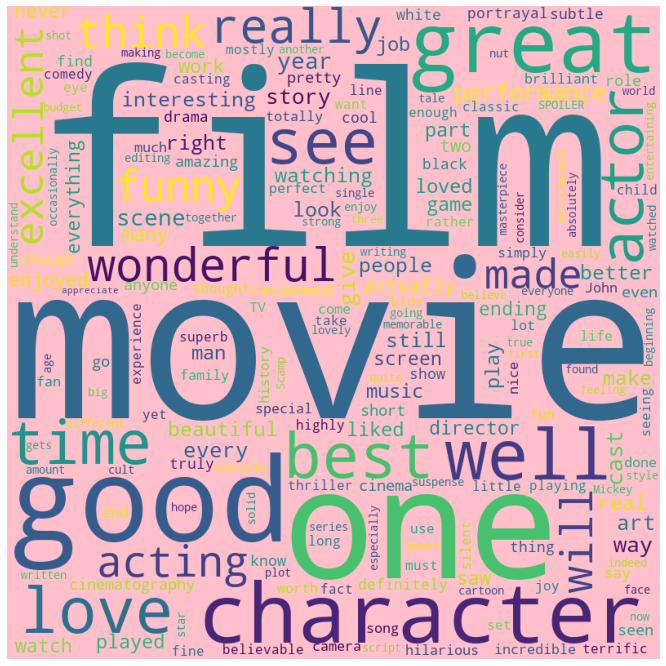

In [12]:
#Create a Wordcloud
#First create object
#Call
from wordcloud import WordCloud,STOPWORDS
#Create an object of WordCloud class
W_C = WordCloud(width=800,height=800,background_color='pink',stopwords=STOPWORDS,min_font_size=10)
#Generate
#S_NS[S_NS['category']== 'not spam']
W_C.generate(''.join(R_NS[R_NS['sentiment']==1]['review']))
#Generate() inbuilt method of WordCloud class

#Show wordcloud on output screen
import matplotlib.pyplot as MPL
MPL.figure(figsize=(12,12))
#To show image on output screen : imshow() means image show.
MPL.imshow(W_C)
MPL.axis('off')
MPL.show()

In [13]:
#Preprocessing on text,here text is Message
#Create user defined function
def Clean_Text(text):
    #First convert text in lower case
    text = text.lower()
    #print(text)
    #Next apply word tokenize on given text
    tokens = word_tokenize(text)
    #print(tokens)
    word_tokens = [w for w in tokens if w.isalpha()]
    #To remove stop words from given message
    #Create object of stopwords class
    stopped_words = stopwords.words('english')
    clean_tokens = [w for w in word_tokens if w not in stopped_words]
    #print(clean_tokens)
    #Next apply lemmatization on clean_tokens list
    #Create object of WordNetLemmatizer class
    lemma = WordNetLemmatizer()
    lemma_tokens = [lemma.lemmatize(w) for w in clean_tokens]
    return " ".join(lemma_tokens)

In [14]:
#Call function in main
R_NS['review'] = R_NS['review'].apply(Clean_Text)

In [15]:
R_NS.sample(9)

,review,sentiment
430,filmmaker director would hide head sand spent ...,0
257,overall movie cheap trash,0
316,telephone repair man really funny reaction nut...,1
604,conclusion bother movie volcano los angeles no...,0
851,acting beyond abysmal,0
470,point proceeding look remotely like america,0
562,film look cheap bland,0
241,good intention made film great film might one ...,1
464,thing worse taylor acting stanwyck singing,0


In [16]:
#Select Input and Output
IP = R_NS['review'] #Input
OP = R_NS['sentiment'] #Output 

In [17]:
#Train_Test split (80%-20%)
from sklearn.model_selection import train_test_split
IP_train,IP_test,OP_train,OP_test=train_test_split(IP,OP,test_size=0.2,random_state=1)

In [18]:
#Find the no. of words in given review in dataset
#first initialize empty list
sent_len = []
for sent in R_NS['review']:
    sent_len.append(len(word_tokenize(sent))) #add length of words of each
    #message on sent_len list
    
#To add new column sentence_length on existing dataset R_NS
R_NS['sentence_length']=sent_len
R_NS.head()

,review,sentiment,sentence_length
0,sure lost flat character audience nearly half ...,0,8
1,attempting artiness black white clever camera ...,0,17
2,little music anything speak,0,4
3,best scene movie gerardo trying find song keep...,1,10
4,rest movie lack art charm meaning emptiness wo...,0,10


In [19]:
#Find the maximum length of the sentence
max(R_NS['sentence_length'])

38

In [20]:
R_NS['sentence_length'].value_counts()

5     126
3     109
4     104
2      93
7      81
6      75
8      63
9      61
10     39
1      39
12     38
11     37
14     25
13     24
15     14
16     13
17      9
21      8
19      8
18      7
20      5
0       3
24      3
26      3
23      2
22      2
28      2
27      1
38      1
36      1
30      1
33      1
25      1
Name: sentence_length, dtype: int64

In [21]:
R_NS[R_NS['sentence_length']==0]

,review,sentiment,sentence_length
124,,1,0
787,,1,0
910,,0,0


In [22]:
NP.quantile(R_NS['sentence_length'],0.95)
#Taken sentence only 95% and 5% sacrifice

17.0

In [23]:
#We can see that 95% review text are of length less than or equal to 17
#We will keep the max length to 17
max_len=17

In [24]:
#Tokenization,keras level
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
#Create object of Tokenizer class
Tok = Tokenizer(char_level=False,split=' ')#Tokenize word level
#By default char_level = True
Tok.fit_on_texts(IP_train)
#fit on texts() inbuilt method of tokenizer class

In [26]:
#To see uniue ID of each word,use inbuilt attributes index_word 
#of tokenizer
Tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'bad',
 5: 'character',
 6: 'good',
 7: 'like',
 8: 'time',
 9: 'even',
 10: 'acting',
 11: 'really',
 12: 'great',
 13: 'well',
 14: 'scene',
 15: 'see',
 16: 'story',
 17: 'make',
 18: 'actor',
 19: 'best',
 20: 'work',
 21: 'made',
 22: 'could',
 23: 'plot',
 24: 'think',
 25: 'thing',
 26: 'look',
 27: 'ever',
 28: 'seen',
 29: 'script',
 30: 'love',
 31: 'better',
 32: 'way',
 33: 'wonderful',
 34: 'would',
 35: 'year',
 36: 'real',
 37: 'also',
 38: 'much',
 39: 'watch',
 40: 'watching',
 41: 'line',
 42: 'performance',
 43: 'part',
 44: 'never',
 45: 'excellent',
 46: 'stupid',
 47: 'show',
 48: 'cast',
 49: 'life',
 50: 'anyone',
 51: 'little',
 52: 'go',
 53: 'nothing',
 54: 'get',
 55: 'every',
 56: 'know',
 57: 'give',
 58: 'people',
 59: 'two',
 60: 'music',
 61: 'recommend',
 62: 'funny',
 63: 'say',
 64: 'pretty',
 65: 'dialogue',
 66: 'art',
 67: 'saw',
 68: 'waste',
 69: 'awful',
 70: 'terrible',
 71: 'man',
 72: 'many',
 73: 'lot

In [27]:
len(Tok.index_word)

2268

In [28]:
IP_train.head()

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
Name: review, dtype: object

In [29]:
sequence_train=Tok.texts_to_sequences(IP_train)
sequence_train

[[181, 121, 824, 20, 122, 105, 825, 74, 313],
 [3, 106, 314, 1, 27, 28],
 [826, 1, 6],
 [315, 182, 38, 827, 316, 317],
 [142, 828, 829, 318, 47, 4, 9, 481, 48, 319, 320, 47],
 [830,
  831,
  27,
  12,
  482,
  183,
  16,
  832,
  321,
  184,
  833,
  834,
  835,
  185,
  836,
  837,
  183,
  107,
  186,
  236],
 [24, 2, 322, 838, 483, 839, 55, 75],
 [187, 5, 188, 237, 840],
 [11, 6, 47, 39],
 [484, 841, 189, 323, 143, 324, 842, 5, 49],
 [843, 844, 845],
 [74, 485, 2, 846, 847, 848, 849, 48],
 [238],
 [486, 76, 4, 325, 2, 121, 11, 7, 190, 2, 4, 144, 3, 145, 50, 22, 487],
 [850, 108, 123, 4, 63],
 [16, 488, 851, 852, 853, 489, 35, 490, 11, 491, 854, 492, 493, 5, 855],
 [56, 239],
 [29, 856, 29],
 [56, 857, 858, 326, 22, 38, 859, 13, 860],
 [57, 3, 861],
 [108,
  1,
  494,
  9,
  862,
  63,
  327,
  328,
  495,
  146,
  191,
  17,
  329,
  496,
  147,
  192,
  497,
  191,
  17,
  329,
  25],
 [3, 106, 148, 1, 863, 330, 238, 864, 106, 865],
 [498, 866, 40, 2],
 [16, 41, 77, 86],
 [331, 867

In [30]:
IP_train.shape

(799,)

In [31]:
max_len

17

In [32]:
from tensorflow.keras.preprocessing import sequence

In [33]:
#Add padding sequence
sequence_matrix_train = sequence.pad_sequences(sequence_train,maxlen=max_len)

In [34]:
sequence_matrix_train

array([[  0,   0,   0, ..., 825,  74, 313],
       [  0,   0,   0, ...,   1,  27,  28],
       [  0,   0,   0, ..., 826,   1,   6],
       ...,
       [  0,   0,   0, ...,   9,  36,   1],
       [  0,   0,   0, ...,  65,  22,  52],
       [  0,   0,   0, ...,   0, 421, 769]])

In [35]:
#Access first sequence
sequence_matrix_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0, 181, 121, 824,  20, 122,
       105, 825,  74, 313])

In [36]:
#Now a create a sequential model means goes to neural network
#To train the model
from tensorflow.keras.models import Sequential

In [37]:
#Create object of sequential model class
model = Sequential()

In [38]:
vocab_len = len(Tok.index_word)
vocab_len

2268

In [39]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
#RNN - Recurrent neural network
#To add layers in object of Sequential class
model.add(Embedding(vocab_len+1,500,input_length = max_len,mask_zero=True))
#Second parameter is passing the length of output
#mask_zero : no time consumed for zero padding
model.add(SimpleRNN(units=17,activation = 'tanh'))
#tanh = tangent hyperbolic activation function used in RNN (sequence type)
model.add(Dense(units=17,activation='relu')) #add hidden layer
model.add(Dense(units=1,activation='sigmoid'))#add output layer

In [40]:
#Compile the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
#Early Stopping :
from tensorflow.keras.callbacks import EarlyStopping            
#callbacks inbuilt parameter of fit() 
#create callback : Call_B -
#EarlyStopping() inbuilt function
Call_B=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [42]:
#Compile the model
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
#Train the model,use inbuilt method fit()
model.fit(sequence_matrix_train,OP_train,epochs=2000,batch_size=50,validation_split=0.2,callbacks = Call_B)

Epoch 1/2000


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Rites\AppData\Local\Temp/ipykernel_42404/1455335358.py", line 2, in <module>
      model.fit(sequence_matrix_train,OP_train,epochs=2000,batch_size=50,validation_split=0.2,callbacks = Call_B)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1718]